In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from matplotlib import pyplot as plt

<div style = "text-align: center;">
    <h3> Accepting MNIST Data </h3>
</div>

In [4]:
df = pd.read_csv("resource/mnist_train.csv")
data = np.array(df)
training_examples = (data[:,1:])/255
labels = data[:,0]

<div style = "text-align: center;" >
    <h3> Initializing Weights and Biases</h3>
</div>

In [5]:
def initialize_variables():
    """This function initialize the weights and the biases with some small values"""
    
    W1 = np.random.randn(10, 784) * np.sqrt(2 / 784)  # 784 input units
    B1 = np.zeros((10, 1))  # Biases initialized to zero
    
    W2 = np.random.randn(10, 10) * np.sqrt(2 / 10)    # 10 input units
    B2 = np.zeros((10, 1))  # Biases initialized to zero
    
    return W1,B1,W2,B2

<div style = "text-align: center;" >
    <h3> Forward Propagation</h3>
</div>

<h5> The RELU Function </h5>

In [6]:
def RELU(Z):
    """This function acts just like ramp function"""
    
    return np.maximum(Z,0)

<h5>The Softmax Activation Function</h5>

In [7]:
def softmax(x):
    """
    Compute the softmax of a 2D numpy array (matrix).
    
    Parameters:
    x -- A 2D numpy array of shape (n, 1)
    
    Returns:
    A 2D numpy array where the probabilities in each column sum to 1.
    """
    # Subtract the max for numerical stability (applied to each column)
    exp_x = np.exp(x - np.max(x, axis=0, keepdims=True))
    
    # Calculate the softmax probabilities for each column
    return exp_x / exp_x.sum(axis=0, keepdims=True)


<h5>Forward Propagation</h5>

In [8]:
def Forward_propagation(A0,W1,B1,W2,B2):
    """This function concludes the forward propagation by giving the prediction of 
    the Neural Network in the form of probablity distribution"""
    Z1 = np.matmul(W1,A0) + B1
    A1 = RELU(Z1)
    Z2 = np.matmul(W2,A1) + B2
    A2 = softmax(Z2)
    
    return Z1,A1,Z2,A2

<h5> Get Prediction</h5>

In [9]:
def get_prediction(A2):
    """This function takes the probablity distribution and gives the actual predicted number"""
    
    return np.argmax(A2)

<div style = "text-align: center;">
    <h3> Backpropagation </h3>
</div>

<h5>One hot Encoding</h5>

In [10]:
def one_hot_encoding(label):
    """This function return teh correct probablity distribution of the image"""
    
    zero_array = np.zeros((10,1))
    zero_array[label] = 1
    return zero_array

<h5>RELU derivation</h5>

In [11]:
def RELU_derv(Z):
    return np.heaviside(Z,0)

<h5>Backpropagation</h5>

In [12]:
def Backpropagation(A0,A1,A2,Z1,W2,Y):
    """This function computes the gradient decent of the given probablity distributions"""
    
    dZ2 = A2 - Y
    dW2 = np.matmul(dZ2,np.transpose(A1))
    dB2 = dZ2
    dA1 = np.matmul(np.transpose(W2),dZ2)
    dZ1 = dA1 * RELU_derv(Z1)
    dW1 = np.matmul(dZ1, np.transpose(A0))
    dB1 = dZ1
    
    return dW2,dB2,dW1,dB1

<h5>Get Accuracy</h5>

In [13]:
def get_accuracy(index,sum_true_pred,mini_batchSize):
    """This function returns the efficency of the neural net per mini_batchSize iteration
    Which helps us to see how our efficency is changing"""
    
    efficency = sum_true_pred / (index//mini_batchSize)
    return efficency 
    

<div style = "text-align: center;">
    <h3>Training the Neural Network </h3>
</div>

In [14]:
def training(mini_batchSize, alpha):
    W1,B1,W2,B2 = initialize_variables()
    sum_dW1, sum_dB1, sum_dW2, sum_dB2 = 0,0,0,0
    sum_true_pred = 0
    for index in range(len(training_examples)):
        A0 = np.expand_dims(np.transpose(training_examples[index]), axis = 1)
        Z1,A1,Z2,A2 = Forward_propagation(A0,W1,B1,W2,B2)
        Y = one_hot_encoding(labels[index])
        dW2,dB2,dW1,dB1 = Backpropagation(A0,A1,A2,Z1,W2,Y)
        sum_dW1 += dW1
        sum_dW2 += dW2
        sum_dB1 += dB1
        sum_dB2 += dB2
        if (index > 0) and (index % mini_batchSize == 0):
            W1 = W1 - alpha * (sum_dW1/mini_batchSize)
            W2 = W2 - alpha *(sum_dW2/mini_batchSize)
            B1 = B1 - alpha *(sum_dB1/mini_batchSize)
            B2 = B2 - alpha *(sum_dB2/mini_batchSize)
            sum_dW1, sum_dB1, sum_dW2, sum_dB2 = 0,0,0,0
            # Now we check wether the accuracy is increasing every 100th iteration
            _,_,_,A2 = Forward_propagation(A0,W1,B1,W2,B2)
            prediction = get_prediction(A2)
            if prediction == labels[index]:
                sum_true_pred += 1
            # efficency = get_accuracy(index,sum_true_pred,mini_batchSize)
            # print(f"Prediction: {prediction} and Label: {labels[index]}")
            # print(f"efficency: {efficency}%")
    
    return W1,B1,W2,B2,sum_true_pred

In [15]:
W1,B1,W2,B2,sum_true_pred = training(5,0.1)
efficency = (sum_true_pred / 12000) * 100
print(f"efficency: {efficency}%")

efficency: 96.15833333333333%


<div style = "text-align: center;" >
    <h3> Testing The Neural Network </h3>
</div>

<h5>Getting test data</h5>

In [16]:
df_test = pd.read_csv("resource/mnist_test.csv")
data_test = np.array(df_test)
test_examples = (data_test[:,1:])/255
test_labels = data_test[:,0]

<h5>Make prediction</h5>

In [17]:
def make_prediction(W1,B1,W2,B2,A0):
    """This function makes prediction to test out neural network"""
    
    _,_,_,A2 = Forward_propagation(A0,W1,B1,W2,B2)
    prediction = get_prediction(A2)
    return prediction

<h5>Test prediction</h5>

In [18]:
def test_prediction(W1,B1,W2,B2,index):
    image = test_examples[index]
    A0 = np.expand_dims(np.transpose(image), axis = 1)
    prediction = make_prediction(W1,B1,W2,B2,A0)
    print(f"Prediction: {prediction} and Label: {test_labels[index]}")
    
    current_image = image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    

Prediction: 0 and Label: 0


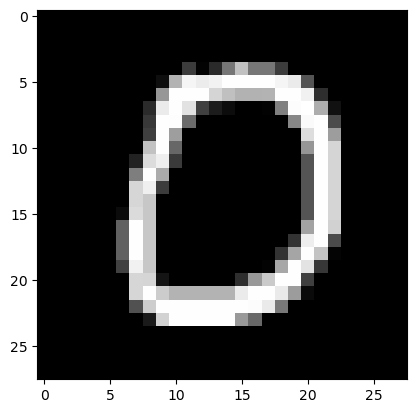

Prediction: 6 and Label: 6


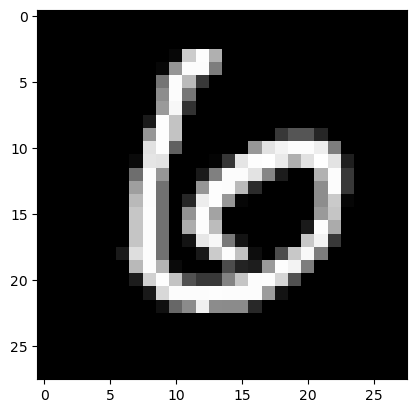

Prediction: 9 and Label: 9


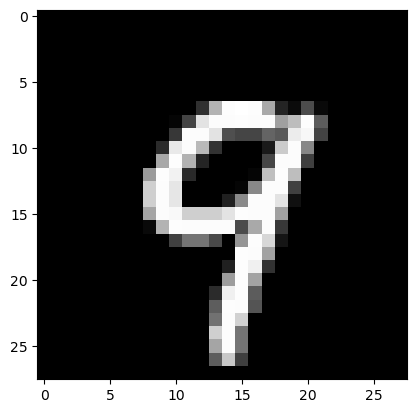

Prediction: 0 and Label: 0


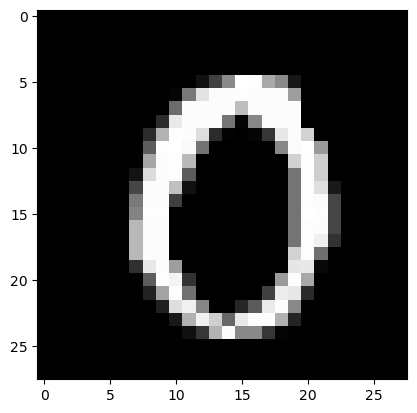

Prediction: 1 and Label: 1


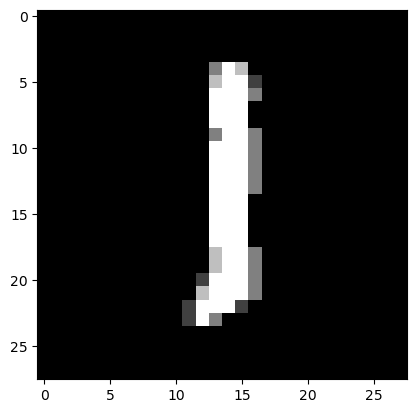

Prediction: 5 and Label: 5


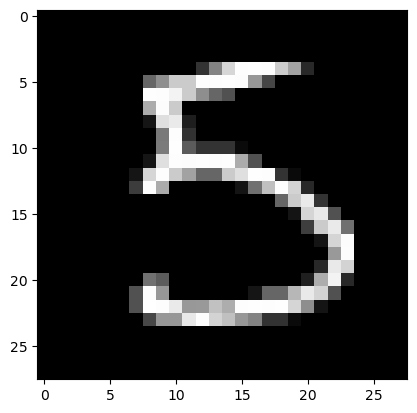

In [19]:
test_prediction(W1,B1,W2,B2,10)
test_prediction(W1,B1,W2,B2,11)
test_prediction(W1,B1,W2,B2,12)
test_prediction(W1,B1,W2,B2,13)
test_prediction(W1,B1,W2,B2,14)
test_prediction(W1,B1,W2,B2,15)